# Step1: Understand Problem Statement

# Step2: Import necessary libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
creditcard_df = pd.read_csv('marketing_data.csv')


In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df['BALANCE'].mean()

1564.4748276781038

In [ ]:
creditcard_df['BALANCE'].max()

19043.13856

In [ ]:
creditcard_df['BALANCE'].min()

0.0

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The customer who made the maximum oneoff purchases

In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]	

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


# Step3: Visualisation of dataset

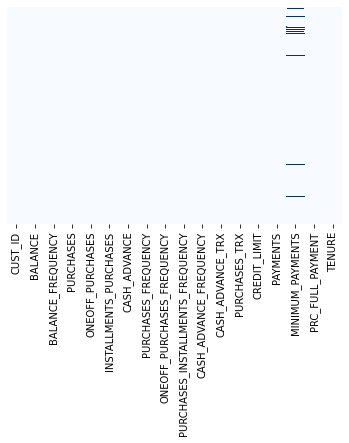

In [ ]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

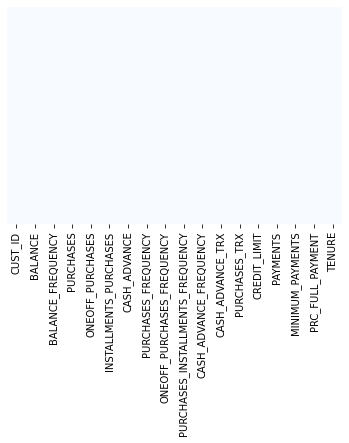

In [ ]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [ ]:
#check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [ ]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
len(creditcard_df.columns)

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

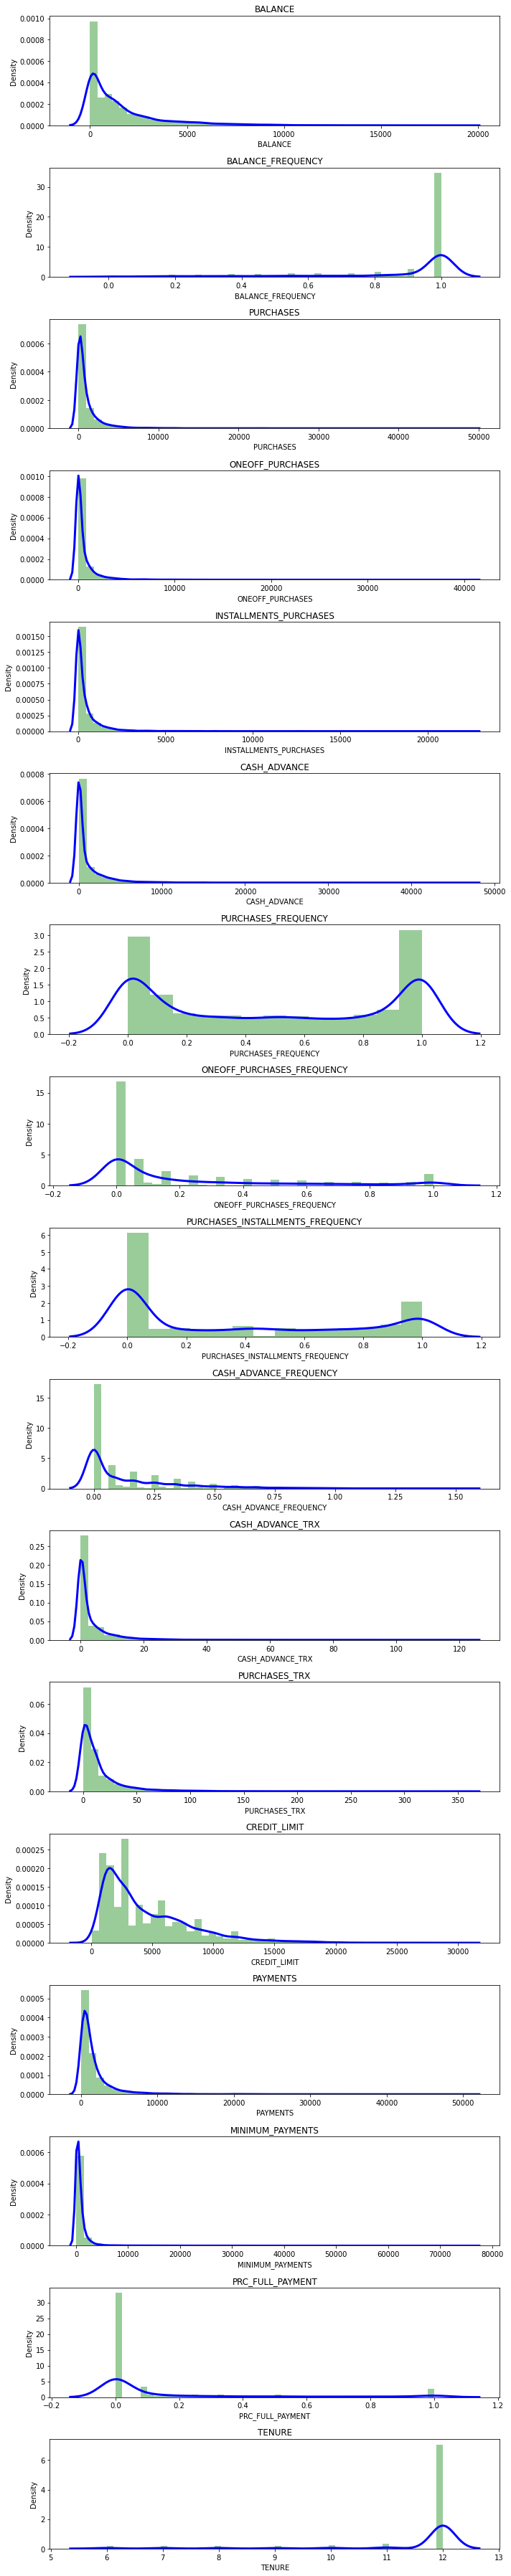

In [ ]:
#distplot: combination of matplotlib.hist function and seaborn kdeplot()
#KDE: Kernel Density Estimate used for visualising the probability density of a continuous variable

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

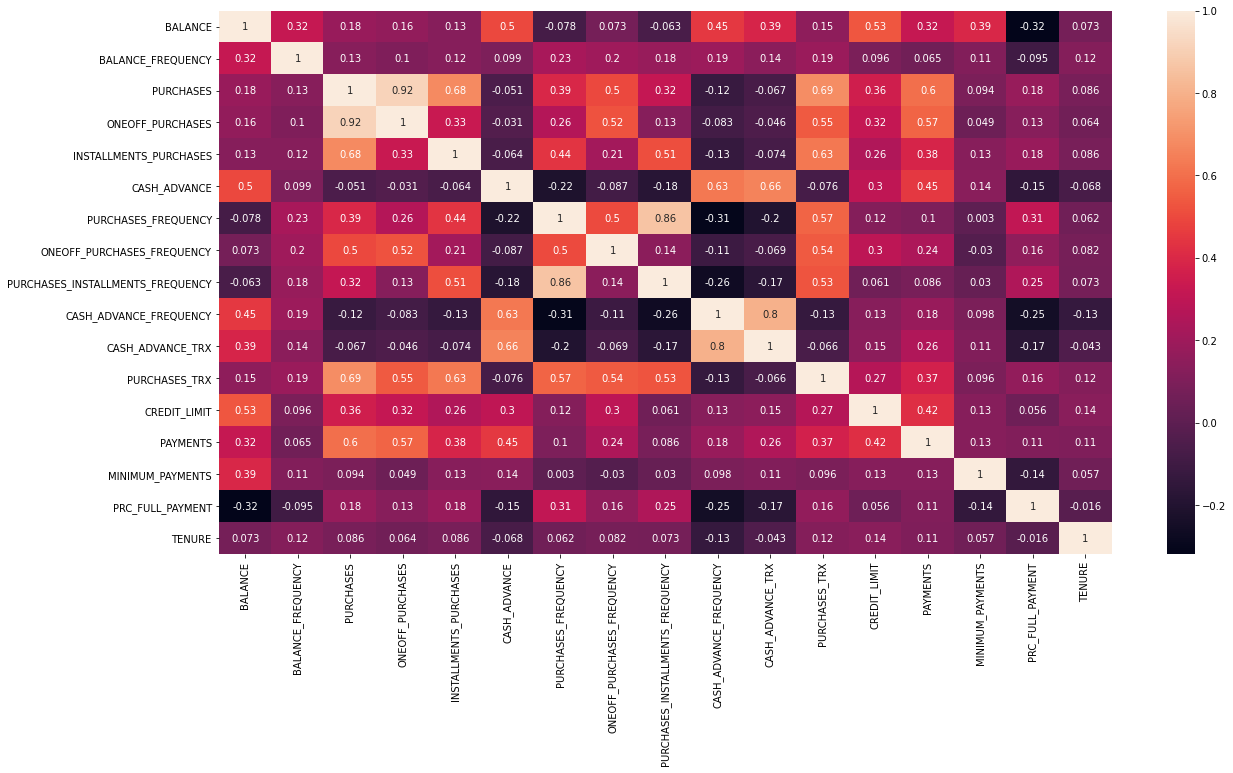

In [ ]:
#correlation matrix between features

correlations=creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

# Step4: K means Algorithm


## Step5: Elbow Method

In [ ]:
#scale data
scaler=StandardScaler()
creditcard_df_s= scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_s.shape

(8950, 17)

In [ ]:
creditcard_df_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

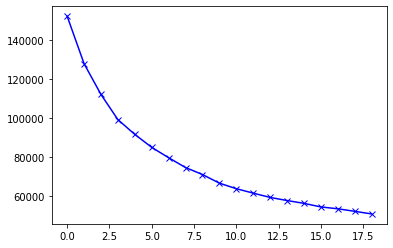

In [ ]:
scores=[]

range_values=range(1,20)

for i in range_values:
  kmean=KMeans(n_clusters=i)
  kmean.fit(creditcard_df_s)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

# Step6: Apply K Means Algorithm

In [ ]:
kmeans= KMeans(7)
kmeans.fit(creditcard_df_s)

label= kmeans.labels_
label

array([2, 0, 3, ..., 6, 6, 6], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])

In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701966,-2.129702,-0.306937,-0.230466,-0.302228,-0.323561,-0.546545,-0.427057,-0.441465,-0.522763,-0.377149,-0.416244,-0.172926,-0.202648,-0.257786,0.295386,0.200063
1,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
2,0.135623,0.430172,0.947784,0.900040,0.587473,-0.306024,1.094193,1.867616,0.538794,-0.407532,-0.317765,1.209332,0.708101,0.396093,-0.033380,0.458376,0.307725
3,-0.370073,0.332833,-0.042637,-0.232102,0.325425,-0.369263,0.971385,-0.349914,1.160783,-0.478622,-0.363617,0.166374,-0.278221,-0.225378,-0.030903,0.297299,0.252640
4,1.698587,0.394565,-0.194603,-0.143832,-0.195980,2.030529,-0.440102,-0.178837,-0.389631,1.930384,1.958903,-0.226594,1.031402,0.858880,0.566827,-0.390474,0.064897
5,0.019414,0.402673,-0.345963,-0.226636,-0.401546,-0.090685,-0.819180,-0.339832,-0.759753,0.104298,-0.026837,-0.467781,-0.293997,-0.242279,-0.012436,-0.452458,0.271179
6,-0.337794,-0.349455,-0.284231,-0.208737,-0.288211,0.065446,-0.197106,-0.271926,-0.229662,0.302135,-0.002861,-0.385258,-0.557568,-0.390736,-0.209560,0.013756,-3.195855


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [ ]:
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])

In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,103.391285,0.372764,347.429370,209.911679,137.766893,300.348988,0.270996,0.075058,0.188988,0.030534,0.675063,4.363560,3865.272413,1146.496499,263.446205,0.240110,11.785055
1,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
2,1846.763192,0.979174,3028.160252,2086.320252,942.312441,337.124030,0.929503,0.759604,0.578568,0.053593,1.080315,44.769291,7070.808876,2879.794610,786.415074,0.287782,11.929134
3,794.198498,0.956116,912.109599,207.195682,705.345870,204.508964,0.880214,0.098072,0.825762,0.039367,0.767408,18.845261,3482.166442,1080.695960,792.189204,0.240669,11.855416
4,5099.939267,0.970740,587.433484,353.705359,233.845799,5236.985090,0.313716,0.149107,0.209588,0.521434,16.616898,9.077546,8247.111742,4219.518605,2185.173907,0.039508,11.604167
5,1604.883841,0.972660,264.048704,216.268033,47.954496,788.700769,0.161574,0.101079,0.062492,0.156015,3.065683,3.082543,3424.768762,1031.768949,835.225803,0.021378,11.880225
6,861.385360,0.794488,395.941226,245.976624,150.442309,1116.114939,0.411243,0.121337,0.273164,0.195605,3.229299,5.133758,2465.787340,602.000784,375.834865,0.157738,7.240446


In [ ]:
label.shape

(8950,)

In [ ]:
label.max()

6

In [ ]:
label.min()

0

In [ ]:
y= kmeans.fit_predict(creditcard_df_s)
y

array([0, 2, 6, ..., 1, 1, 1], dtype=int32)

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'cluster':label})],axis=1)

In [ ]:
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


## Step7: Visualisation

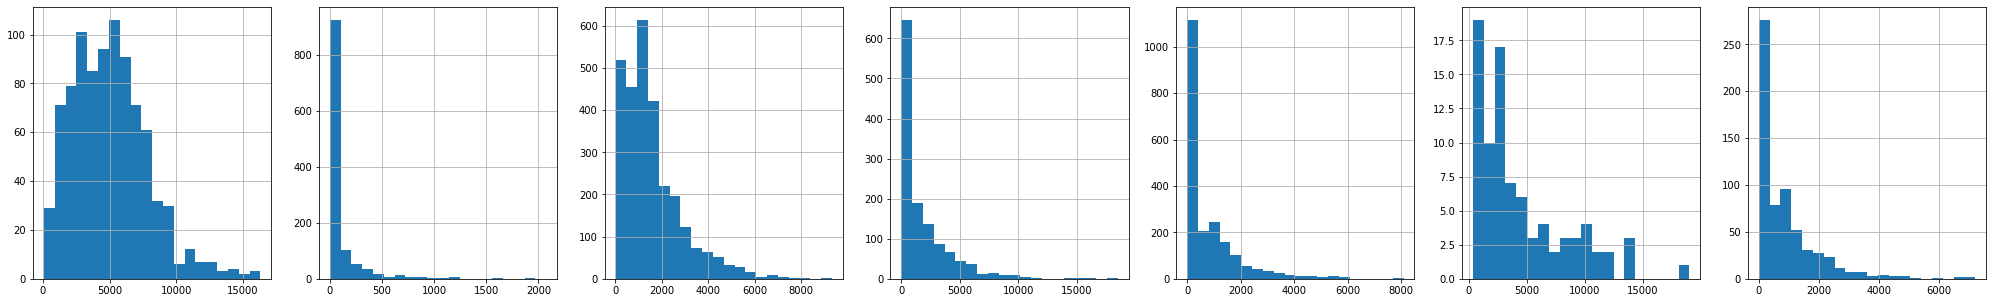

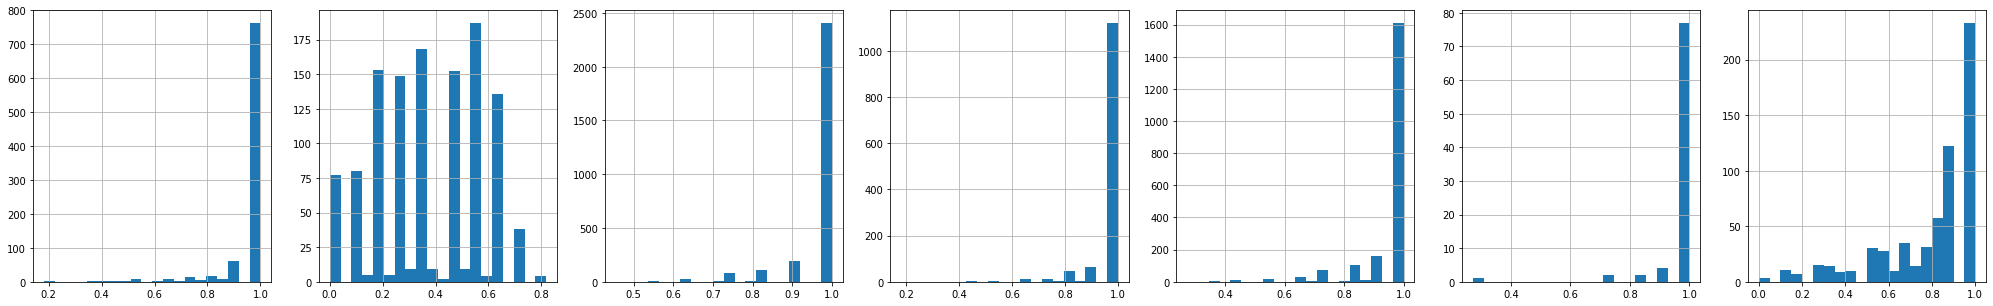

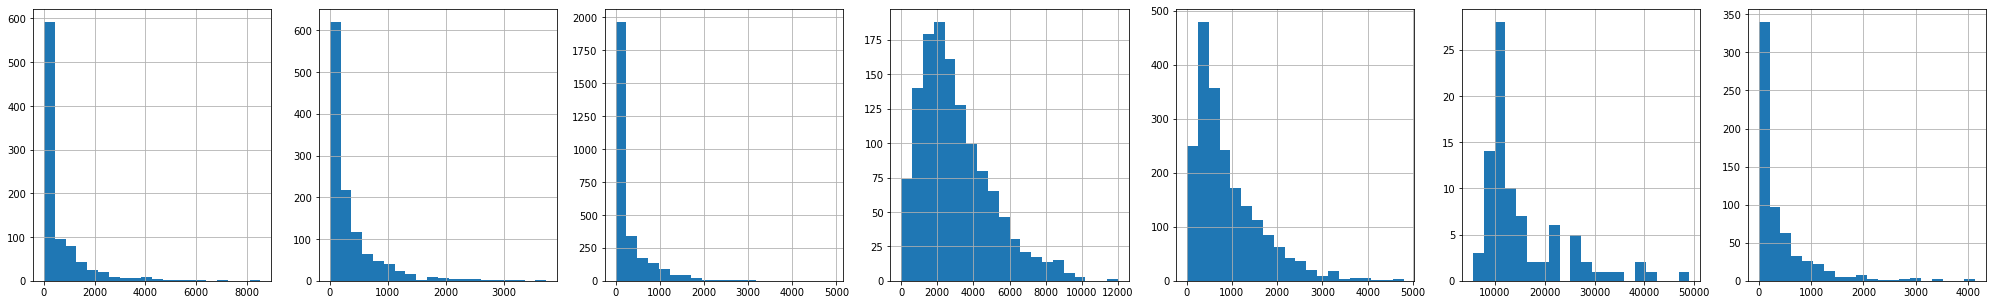

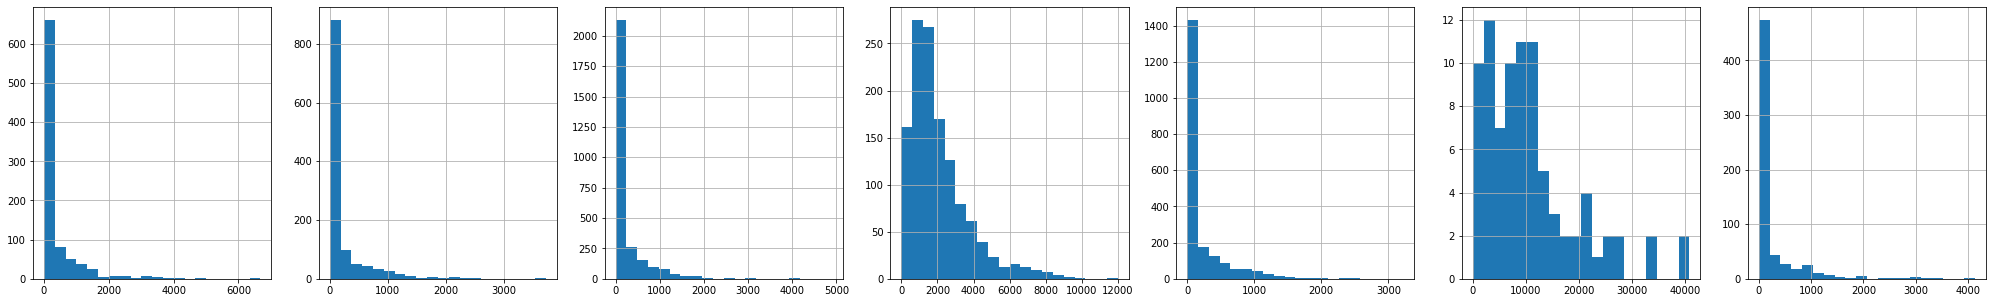

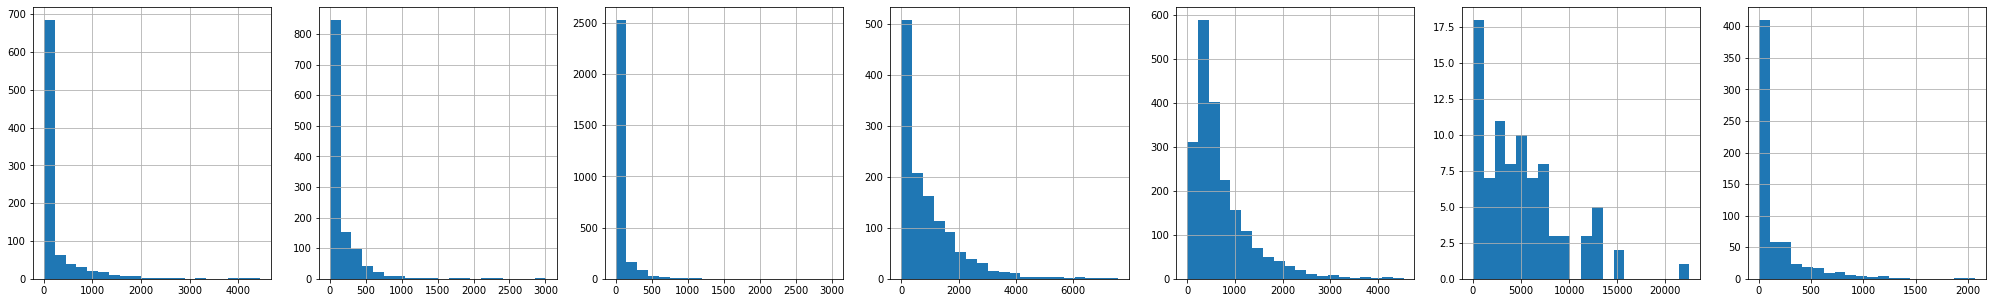

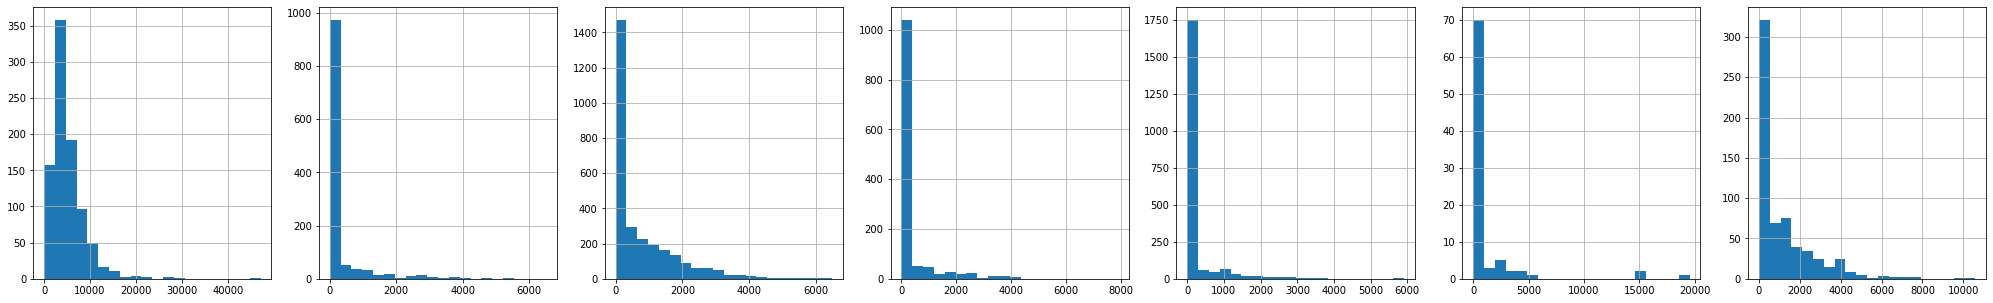

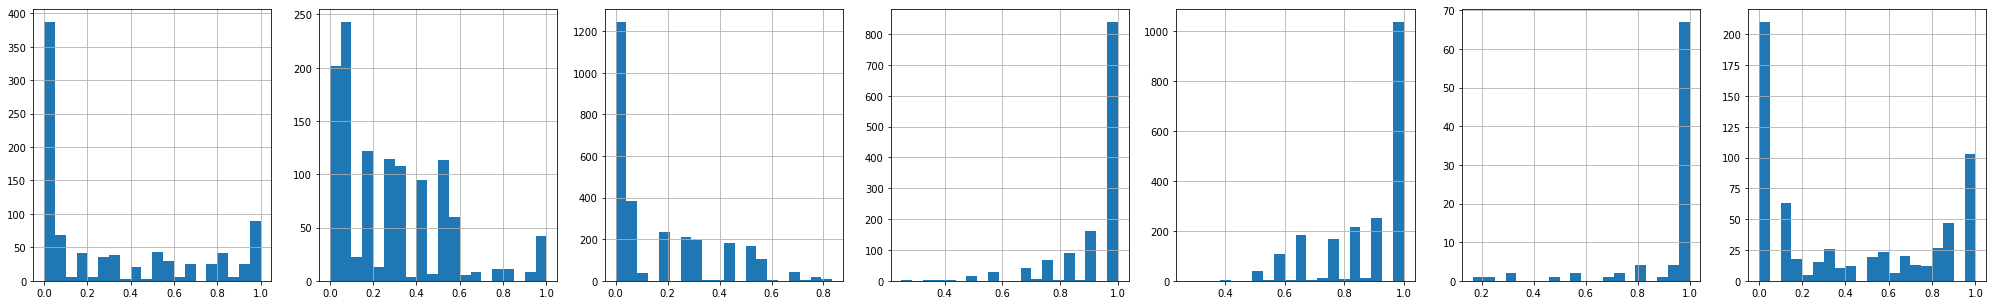

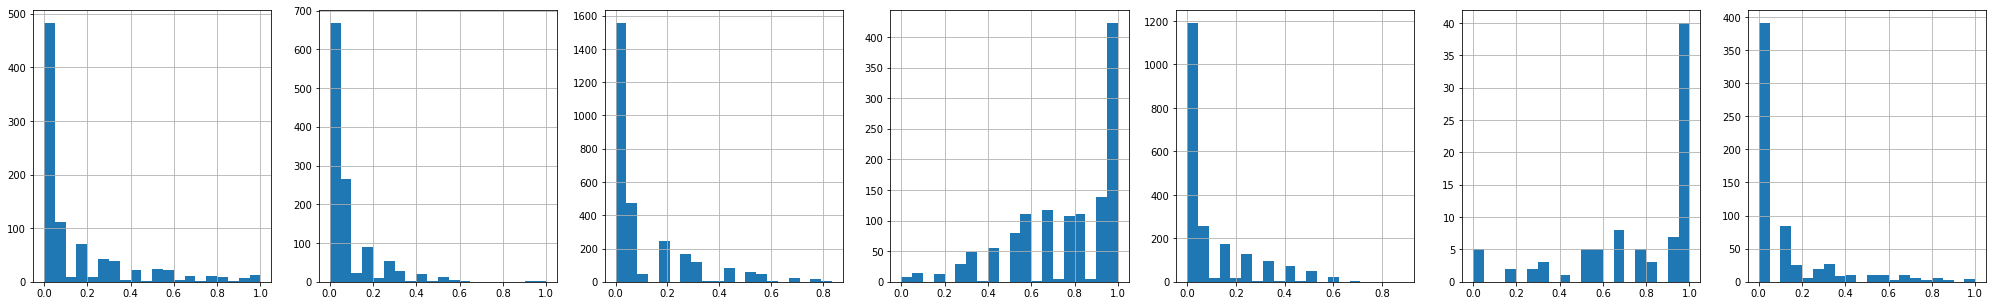

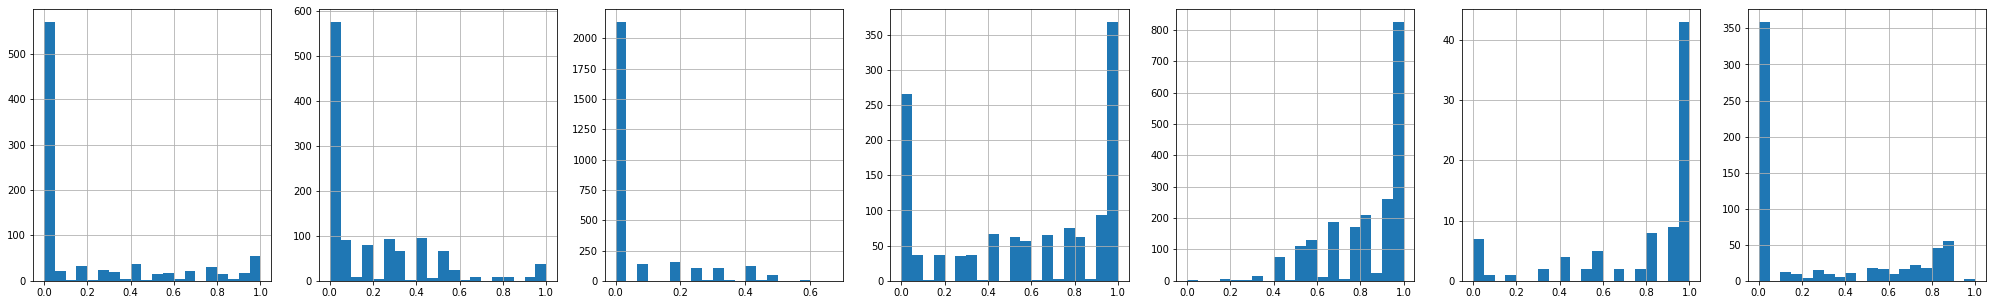

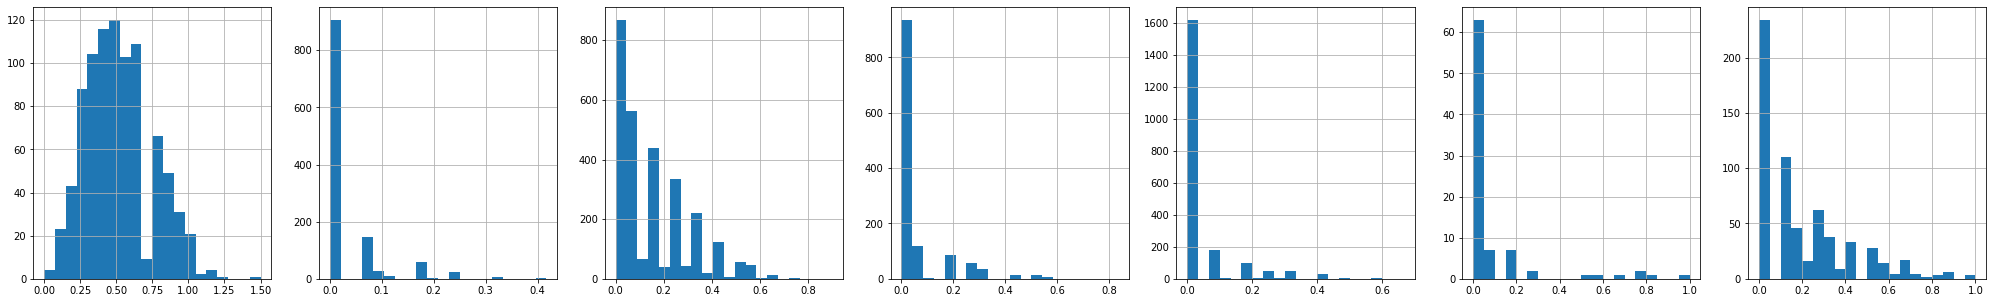

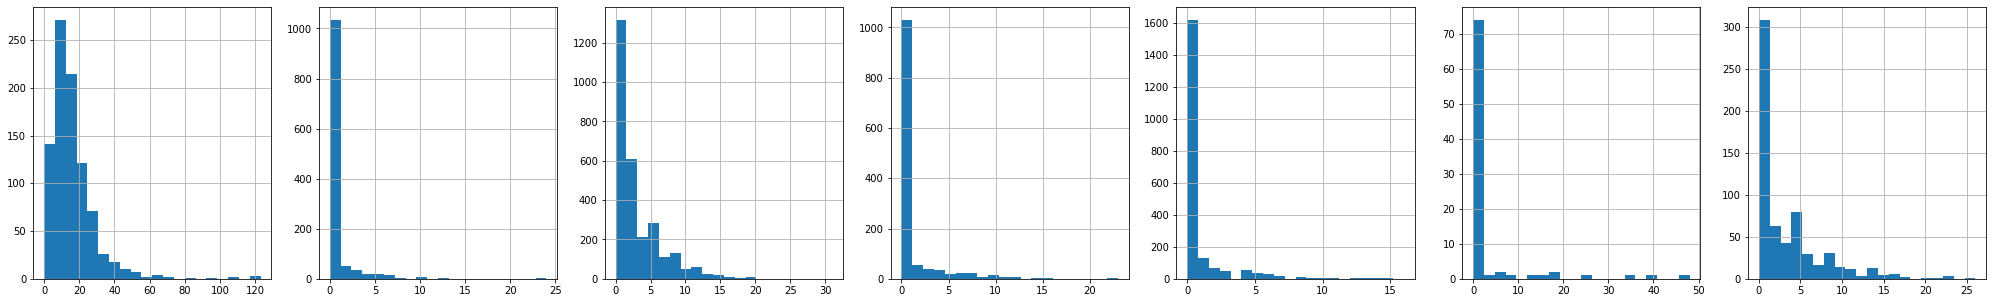

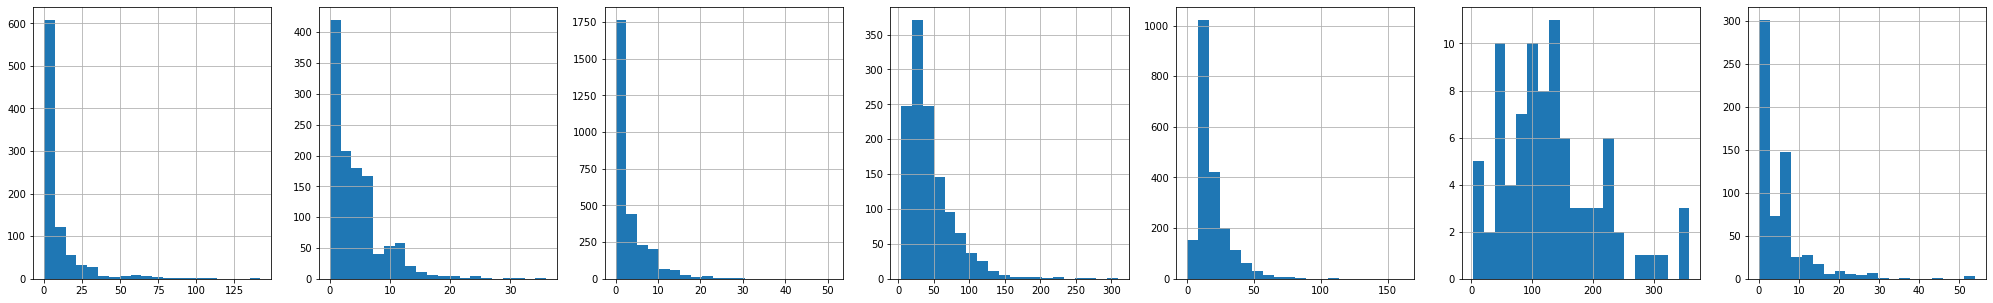

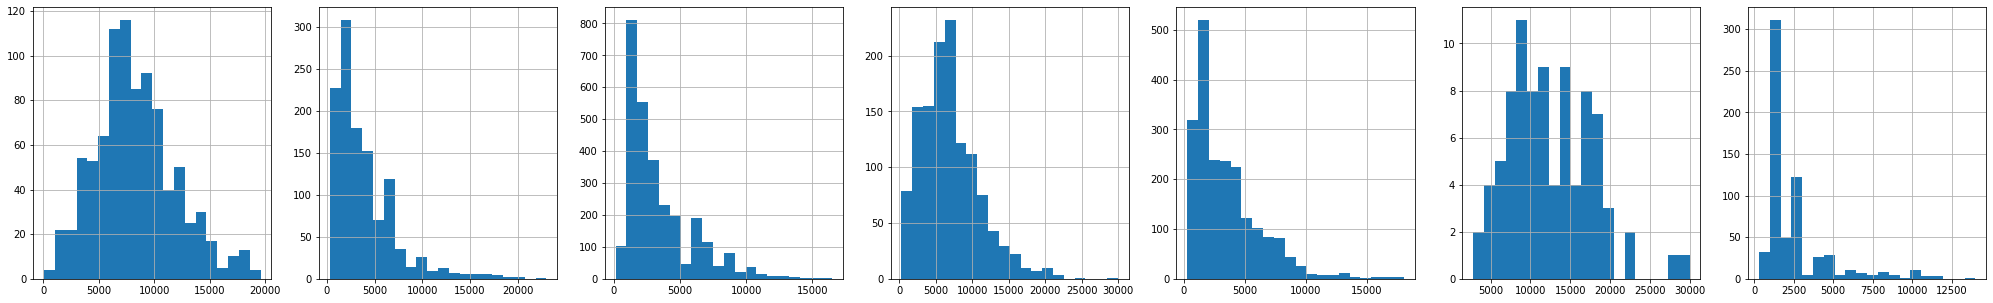

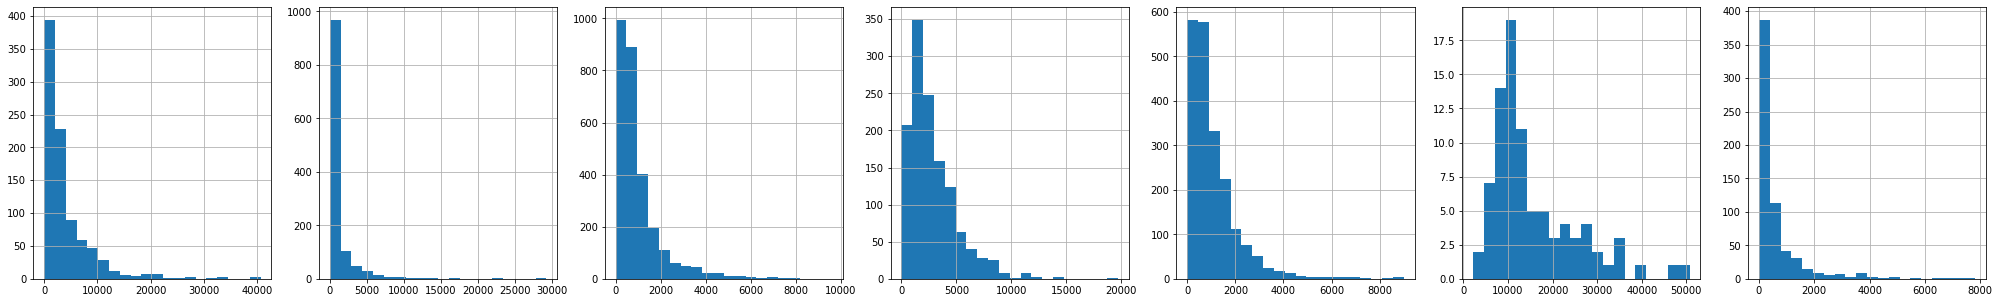

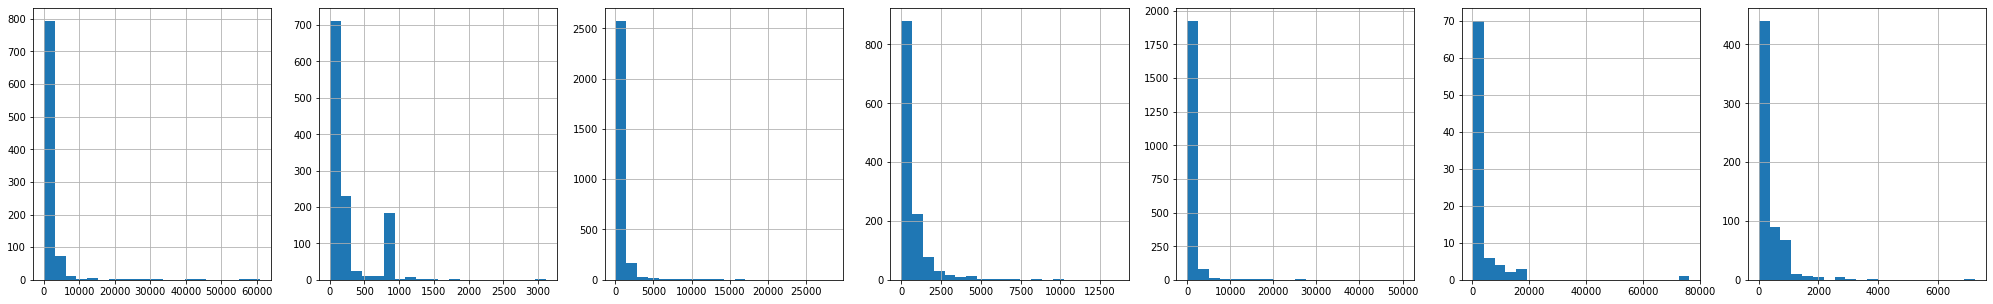

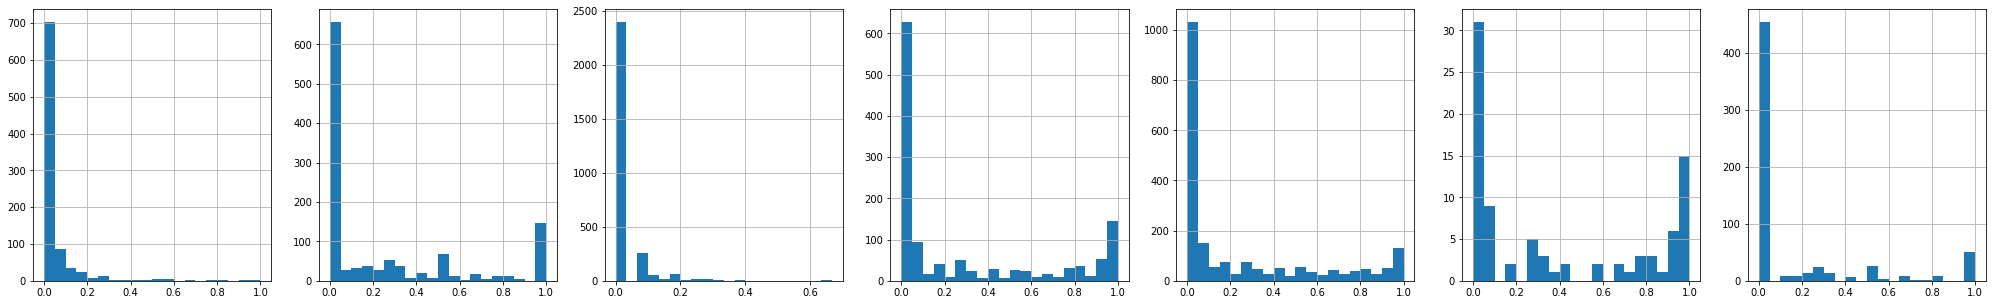

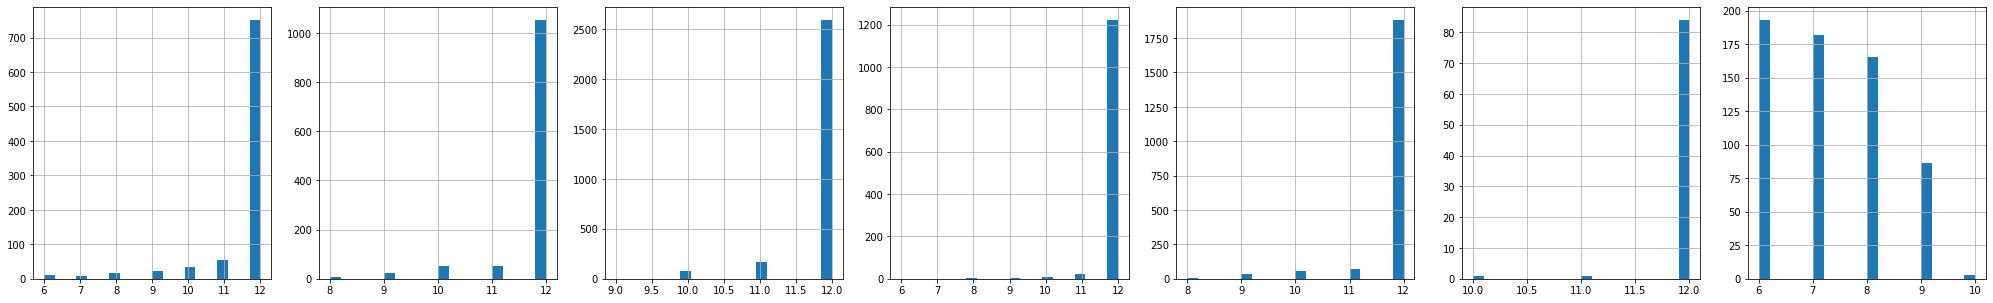

In [ ]:

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
  plt.show()  

## Step8:Principal Component Analysis

In [ ]:
#dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_s)
principal_comp

array([[-1.68222049, -1.07645007],
       [-1.13829352,  2.50648902],
       [ 0.96968336, -0.38352851],
       ...,
       [-0.92620451, -1.81078774],
       [-2.33655214, -0.65796591],
       [-0.5564215 , -0.40046839]])

In [ ]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138294,2.506489
2,0.969683,-0.383529
3,-0.873628,0.043162
4,-1.599434,-0.688579
...,...,...
8945,-0.359630,-2.016146
8946,-0.564370,-1.639134
8947,-0.926205,-1.810788
8948,-2.336552,-0.657966


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682220,-1.076450,2
1,-1.138294,2.506489,0
2,0.969683,-0.383529,3
3,-0.873628,0.043162,2
4,-1.599434,-0.688579,2
...,...,...,...
8945,-0.359630,-2.016146,6
8946,-0.564370,-1.639134,6
8947,-0.926205,-1.810788,6
8948,-2.336552,-0.657966,6


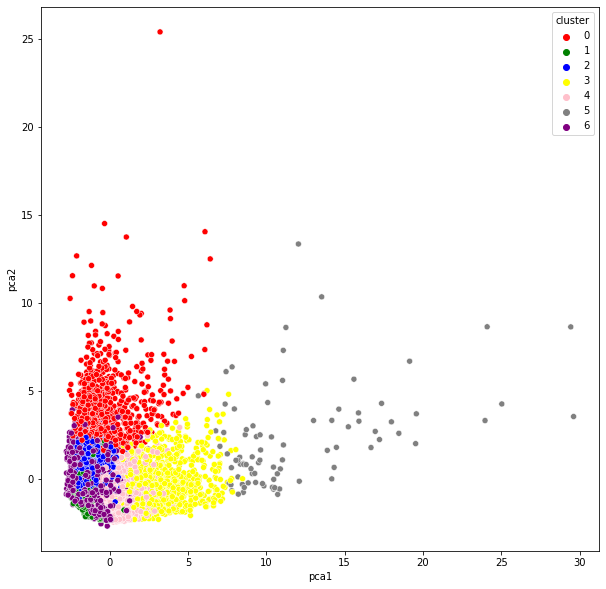

In [ ]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x="pca1", y="pca2", hue="cluster",data=pca_df,palette=['red','green','blue','yellow','pink','grey','purple'])
plt.show()